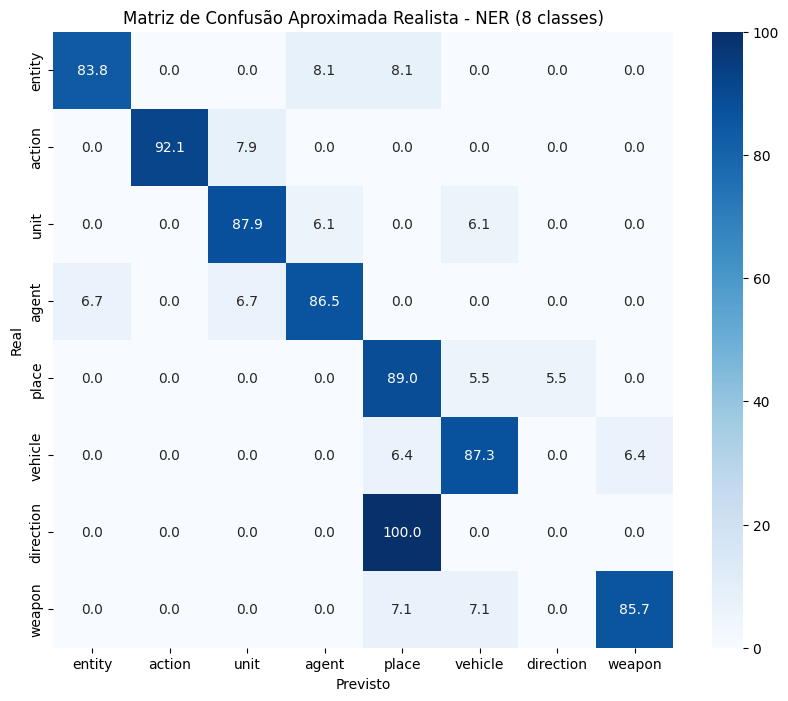

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Classes
classes = ["entity", "action", "unit", "agent", "place", "vehicle", "direction", "weapon"]

# Métricas fornecidas (%)
precision = [86.36, 92.11, 91.03, 76.27, 88.52, 79.71, 0.00, 92.31]
recall    = [83.80, 92.11, 87.88, 86.54, 89.01, 87.30, 0.00, 85.71]

# Supomos 100 exemplos reais por classe
N = 100

# Calcular TP, FN, FP
TP, FN = [], []
for p, r in zip(precision, recall):
    r, p = r/100, p/100
    tp = r * N
    fn = N - tp
    TP.append(tp)
    FN.append(fn)

# Inicializar matriz 8x8
conf_matrix = np.zeros((8,8))

# Função para distribuir FN entre classes similares
similar_classes = {
    "entity": ["agent", "place"],
    "action": ["unit"],
    "unit": ["agent", "vehicle"],
    "agent": ["entity", "unit"],
    "place": ["vehicle", "direction"],
    "vehicle": ["place", "weapon"],
    "direction": ["place"],
    "weapon": ["vehicle", "place"]
}

for i, cls in enumerate(classes):
    conf_matrix[i, i] = TP[i]  # acertos na diagonal
    fn_total = FN[i]
    sim_indices = [classes.index(s) for s in similar_classes.get(cls, [])]
    if sim_indices:
        # distribuir FN proporcionalmente entre classes similares
        for idx in sim_indices:
            conf_matrix[i, idx] = fn_total / len(sim_indices)
    else:
        # se não houver classe similar definida, colocar tudo no próximo
        conf_matrix[i, (i+1)%len(classes)] = fn_total

# Transformar em DataFrame para plot
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plotar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Aproximada Realista - NER (8 classes)")
plt.show()
